### **Machine Learning - K-nearest neighbors (KNN)**
- **KNN** is a **supervised machine learning** algorithm for classifying data points ( *observations*),  
based on the values of the closest existing points
- **k** is the number of nearby points -- neighbors -- to use in the comparison
- **k** is often set to 5, but 3 is also commonly used. 1 is considered too low



In [ ]:
# 1. Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import pprint as pp

# 2. import KNN model
from sklearn.neighbors import KNeighborsClassifier

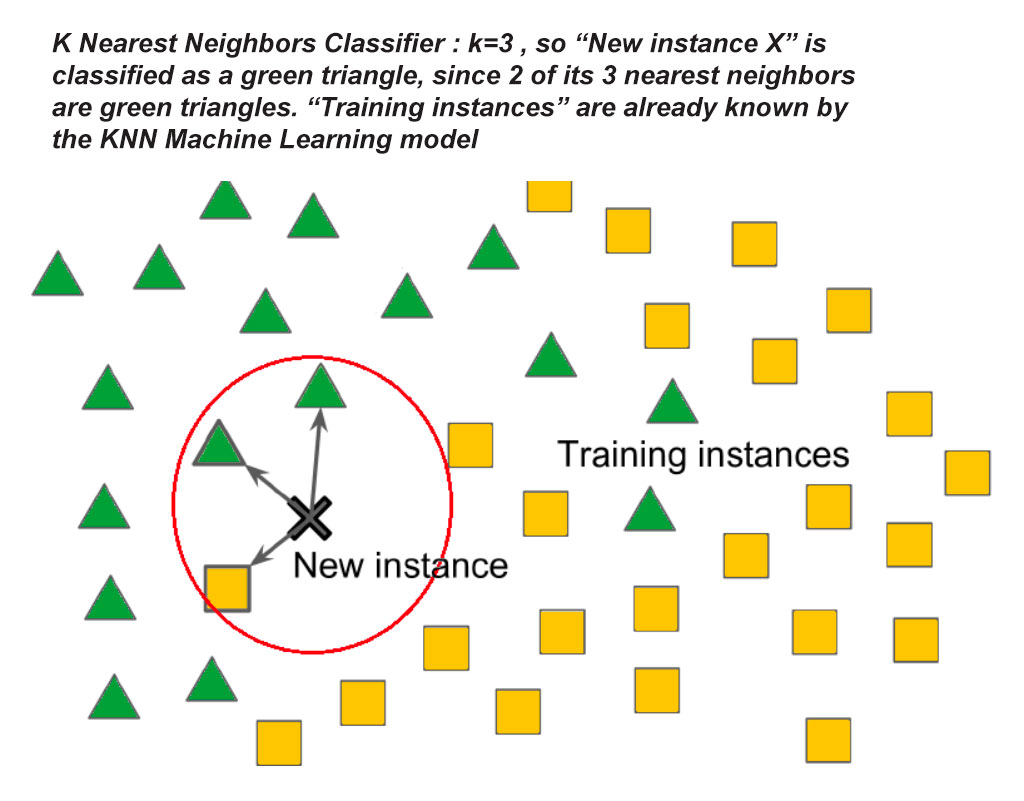

In [ ]:
# 3. Display the KNN.jpg image
Image("/images/KNN.jpg", width=500)

In [ ]:
# 4. defines some points to plot, as lists x and y
#.   and make another list of classes, either 0 or 1, 
#.   to assign to the plotted points

x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

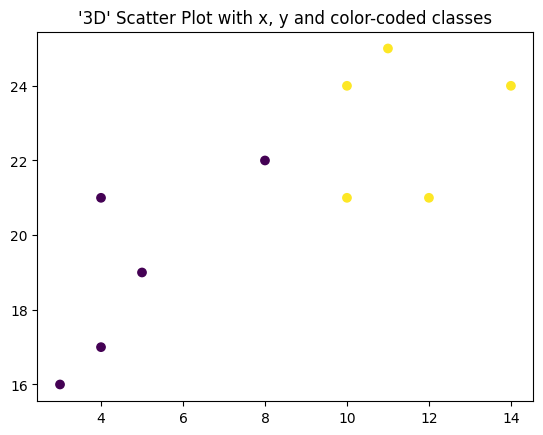

In [ ]:
# 5. Scatter plot the points; 
plt.scatter(x,y, c=classes)
plt.title("Scatter Plot with x, y and color-coded classes")
plt.show()

**How to loop more than one list at the same time:**
- **for i, item enumerate(list)** gives access to the index as you loop
    - loop one list, access corresponding item by index in another list

In [ ]:
# 6. Make two lists, fruits and veggies
fruits = ['apple', 'banana', 'cherry', 'watermelon', 'kiwi', 'mango']
veggies = ['carrot', 'celery', 'beet', 'kale', 'tomato', 'cucumber']

-Using **enumerate()**, make fruit-veggie smoothies from corresponding items in the two lists

In [ ]:
# 7. Declare a new empty list called fru_veg_smoothies to hold the results
#    ['apple-carrot', 'banana-celery', 'cherry-beet'.. etc.]
fru_veg_smoothies = []

# 8. Loop the fruits list, wrapping fruits in the enumerate() method
# this unlocks the index, which you declare before fru, the current fruit
for i, fru in enumerate(fruits):
  # 9. Look up the corresponding veg from veggies list:
  veg = veggies[i]
  # 10. Concatenate a smoothie as 'fru-veg'
  smoothie = f"{fru}-{veg[i]}"
  # 11. Append the smoothie to the new list
  fru_veg_smoothies.append(smoothie)

print(fru_veg_smoothies) # ['apple-carrot', 'banana-celery', 'cherry-beet'.. etc.]

['apple-carrot', 'banana-celery', 'cherry-beet', 'watermelon-kale', 'kiwi-tomato', 'mango-cucumber']


- **zip()**: another way to loop more than one list at the same time:**
    - **for x,y in zip(list1, list2)** loops two lists at at same time
    - zip gives access to corresponding items in each list

In [ ]:
# 12. Same as above, but using zip() instead of enumerate()
# advantage of zip: does NOT need index to look up list item
smoothies = []

for fru, veg in zip(fruits,veggies):
    smoothies.append(f'{fru}-{veg}')
    
print(smoothies)

['apple-carrot', 'banana-celery', 'cherry-beet', 'watermelon-kale', 'kiwi-tomato', 'mango-cucumber']


In [ ]:
# 13. Redefine the x, y, classes again, for ease of reference:
x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

In [ ]:
# 14. Using zip, loop x and y at the same time
# and save their product into a new list called products:
products = []

for _x, _y in zip(x,y):
  products.append(_x * _y)

print(products) # [84, 95, 240, 68, 48, 275, 336, 176, 210, 252]

[84, 95, 240, 68, 48, 275, 336, 176, 210, 252]


In [ ]:
# Loop x and y at same time using zip
# make this list of corresponding x-y pairs :
# just bundle each x, y in parentheses and append to list
# save the 10 (x,y) tuples to a new list called scatter_dots:

# 15. Declare a new list called scatter_dots:
scatter_dots = []

# 16. Loop both x and y lists at once, with zip()
# declare _x and _y to be the current value of x and y
for _x, _y in zip(x,y):
  # 17. Append a tuple as (_x,_y) to the new list:
  scatter_dots.append( (_x,_y) )

print(scatter_dots) # [(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)],
print(scatter_dots[0], type(scatter_dots), type(scatter_dots[0]))

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]
(4, 21) <class 'list'> <class 'tuple'>


In [ ]:
# 18. Zip up the x and y values into a "zip object"
xy_dots = zip(x,y)
print(xy_dots)
# <zip object at 0x7d01114dcc40> <class 'zip'>

In [ ]:
# 19. Get a list from the zip object
xy_dots = list(xy_dots)
print(xy_dots)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]


:**KNeighborsClassifier(n_neighbors)** returns a knn machine learning model for training and predicting using k-nearest neighbors algorithm

In [ ]:
# 20. Instantiate a KNeighborsClassifier model
#    set n_neighbors to 1 for this first example:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [36]:
print(classes)

[0, 0, 1, 0, 0, 1, 1, 0, 1, 1]


**training the knn model**.
- **knn.fit(data_points, classes)** method is used to train the model
- fit takes two arguments:
  - a list of tuples of (x,y) data points
  - a list of corresponding classes (labels)
- the goal of training the model is to be able to show it new data points  
and have it assign the correct class

In [ ]:
# 21. Train (fit) the model:
knn_model.fit(xy_dots,classes)

KNeighborsClassifier(n_neighbors=1)

**testing the knn model**.
- **knn.predict(data_point)** method asks the model to classify as yet unclassified data points
- the classification, not being a 100% certainty, is called a prediction
- predict takes one arguments: an (x,y) data point to classify
- the method returns the predicted class for that data point

In [ ]:
# 22. Make up a new (x,y) tuple; this is an unclassified point
#     which we will ask the model to classify.
x_new = 9
y_new = 19

# 23. Append new x and y to their respective lists:
x.append(x_new)
print(x) # x = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12, 9]
y.append(y_new)
print(y) # y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 19]

[4, 5, 10, 4, 3, 11, 14, 8, 10, 12, 9]
[21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 19]


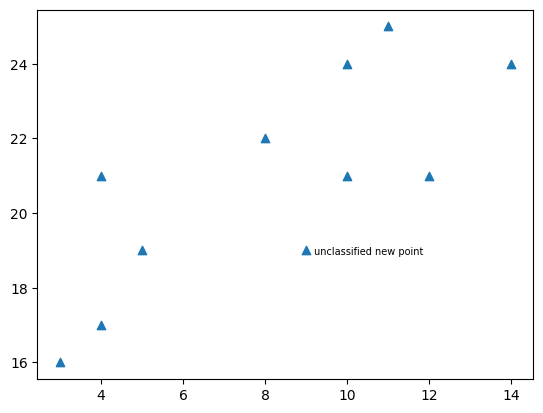

In [ ]:
# 24. Re-do the scatter plot, which now includes the new data point.
#     We cannot set c=classes in the new scatter plot because classes
#     list is not the same length
#     Assign text to the new point
plt.scatter(x,y,marker='^')
plt.text(x=x_new+.2, y=y_new-.1, s='unclassified new point', fontsize=7)
plt.show()

In [ ]:
# 25. Assign a unique class (2) to the new data point, so that it stands out
#     with a unique color. This is just to get all 3 lists (x,y,classes)
#     to be the same length for the scatter() method.
#     After that, we will have the model predict the class (either 0 or 1)
#     The 3rd class/color is just temporary for visualization purposes
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
classes.append(2) # a third color in addtion to 0 and 1

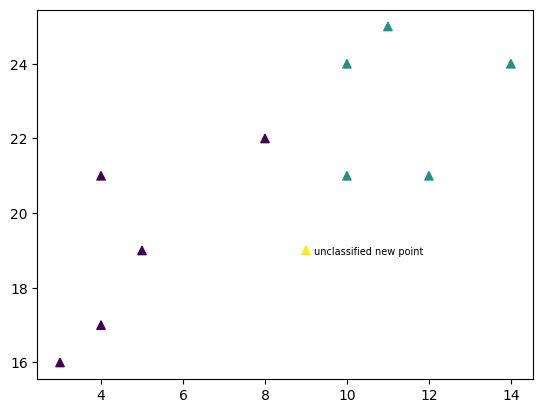

In [ ]:
# 26. Re-do the scatter plot, now with 3 colors for 3 classes (0,1,2)
#     only the new point has the new class/color 2
plt.scatter(x,y,c=classes,marker='^')
plt.text(x=x_new+.2, y=y_new-.1, s='unclassified new point', fontsize=7)
plt.show()

In [ ]:
# 27. Now to assign one class or the other -- 0 or 1 -- to the new point.
#     Make a new (x,y) data point of the two new x and y values
#     This (x,y) tuple, wrapped in [] will be "fed" to the model's predict method
new_unclassified_data_pt = (x_new,y_new)
print(new_unclassified_data_pt, type(new_unclassified_data_pt))
# <class 'tuple'> (9, 19)

(9, 19) <class 'tuple'>


In [ ]:
# 28. Pass the new_data_pt to the model's predict() method.
#     the method returns a class (0 or 1) for the new data point
#     these are the only two classes the model was trained on,
#     so these are the only two possible classification results
#     the provided data needs to be a tuple wrapped in a list,
#     so put [] around new_unclassified_data_pt:
#     the model returns a list of one item, so [0] or [1]
predicted_class = knn_model.predict( [ new_unclassified_data_pt ] )

print('new data point (9,19) is classified as: ', predicted_class)
#     to remove the [], get the item at index 0 from the list:
print('new data point (9,19) is classified as: ', predicted_class[0])

new data point (9,19) is classified as:  [1]
new data point (9,19) is classified as:  1


In [ ]:
# 29. Add the new prediction to the classes list and replot it.
#     Replace the 2 at the end of classes list with the predicted class
#.    append just the 1 -- NOT the list [1]
classes[-1] = int(predicted_class[0])
print(classes)

[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]


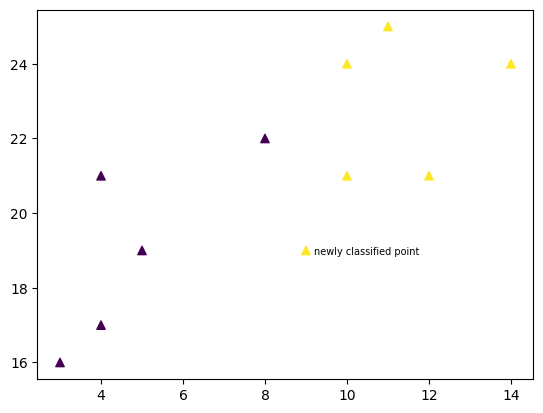

In [ ]:
# 30. Re-do the scatter plot to now include the newly classified point, which
#     we can still label with text -- only now, the point has been assigned
#     the color of class 1
plt.scatter(x,y,c=classes,marker='^')
plt.text(x=x_new+.2, y=y_new-.1, s='newly classified point', fontsize=7)
plt.show()

**k=3** changing nearest neighbors to 3
- the new point is right next to a purple 0, so it too is classified as purple 0.
- **n_neighbors** was set to 1 when we defined the model,  
so the model is only considering the ONE nearest neighbor
- there are some yellow 1 dots in the vicinity, however, which would  
change the classification from 0 to 1 if they were to be considered
- reinstantiating the model with **n_neighbors=3** will tell the model to consider the  
3 nearest neighbors, with a majority 2 out of 3 "vote" prevailing

In [ ]:
# 31. Define a new knn model that checks the THREE nearest neighbors
knn_model2 = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 32. Train the new "3 neighbors" model with our x, y lists of x,y data pt tuples
x_y_points_list = list(zip(x,y))
print(x_y_points_list)
# also providing classes to go with each point; each list should have 11 items

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21), (9, 19)]


In [ ]:
# 33. Train model with x,y and classes
knn_model2.fit(x_y_points_list, classes)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 34. Define a new data point to predict as x and y values
# new_data_point
new_x2 = 8.5
new_y2 = 22.5

# 35. Bundle x and y into a tuple
new_dot = (new_x2,new_y2)

# print it to make sure it worked
print(new_dot)
print(type(new_dot))
print(classes)

<class 'tuple'> (8.5, 22.5)
[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]


In [ ]:
# 35. Have the knn model predict the class of new_data_point
predicted_class = knn_model2.predict([new_dot])
print('new data point (8.5,22.5) is classified as: ',predicted_class[0])

new data point (8.5,22.5) is classified as:  1


In [ ]:
# 36. Append the new_x, new_y and predicted_class to their respective lists
x.append(new_x2)
y.append(new_y2)
classes.append(predicted_class[0])

# each list should have 12 items after appending
print('x:',x, len(x))
print('y:',y, len(y))
print('classes:',classes)

x: [4, 5, 10, 4, 3, 11, 14, 8, 10, 12, 9, 8.5]
y: [21, 19, 24, 17, 16, 25, 24, 22, 21, 21, 19, 22.5]
classes: [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, np.int64(1)]


In [ ]:
# 37. Replace the last class in classes list with the 
#     model's predicted class for the new dot 
classes[-1] = int(predicted_class[0])
print('classes:',classes)

classes: [0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1]


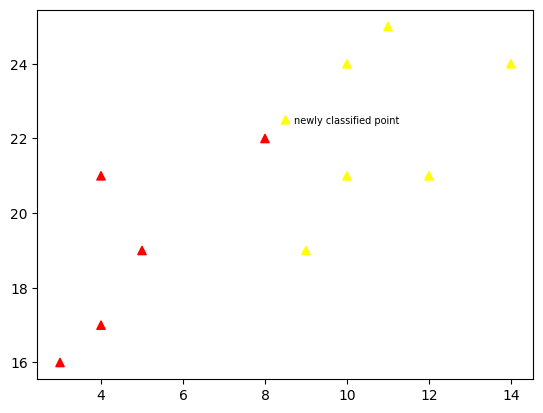

In [ ]:
# 38. Make a scatter plot using the 3 lists of 12 items each: x, y and classes
# label the new_data_point with text, so that we know which one it it
# it is very close to another point, so reposition the text as necessary
plt.scatter(x,y,c=classes,marker='^',cmap='autumn')
plt.text(x=new_x2+.2, y=new_y2-.1, s='newly classified point', fontsize=7)
plt.show()
# L@@K: the new point is yellow, even though the nearest point is purple
#       this is because n_neighbors=3 has it checking the 3 nearest dots